Haben User mit Dropout eher schlechte Predictions bekommen (Intv 2 und 3)?

In [1]:
import pandas as pd
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
import pingouin as pg
import numpy as np
import statsmodels.formula.api as s

c:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
c:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
final = pickle.load(open( '../00_data/final/dropout_per_session.pkl','rb') )
intv2 = final[(final['interventiongroup']=='2')]
intv3 = final[(final['interventiongroup']=='3')]
intv = pd.concat([intv2, intv3])

df = pickle.load(open( '../00_data/cleaned/predictions.pkl','rb') )
df = df[['UebungsID','prediction']]

df = pd.merge(df,intv, on='UebungsID',how='left')
df = df.dropna()
df

,UebungsID,prediction,interventiongroup,Geschlecht,Klassenstufe,UserID,dropout
2,29905241,0.8152,2,m,10,974985.0,0.0
5,29905241,0.9824,2,m,10,974985.0,0.0
6,29905241,0.9209,2,m,10,974985.0,0.0
7,29905241,0.9209,2,m,10,974985.0,0.0
15,29905241,0.1974,2,m,10,974985.0,0.0
...,...,...,...,...,...,...,...
884721,30716585,1.0000,2,m,10,1041846.0,1.0
884722,30716585,0.9091,2,m,10,1041846.0,1.0
884723,30716585,1.0000,2,m,10,1041846.0,1.0
884730,30255382,0.1000,2,m,9,1035433.0,0.0


In [3]:
print(np.corrcoef(df.dropout, df.prediction))

[[ 1.         -0.08869587]
 [-0.08869587  1.        ]]


[Text(0.5, 0, 'Dropout'), Text(0, 0.5, 'Prediction outcome')]

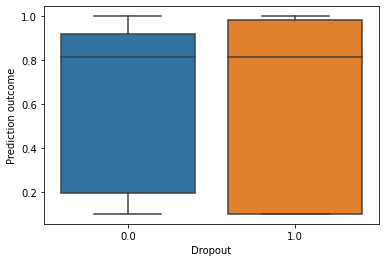

In [5]:
gr = sns.boxplot(data=df, x='dropout',y='prediction',showfliers=True)
gr.set(xlabel ="Dropout", ylabel = "Prediction outcome")
